# <span style="text-decoration: underline">AOS 51 Lab: Data Analysis for Climate Science, Session #2</span>
# <span>🌎🔥 👩🏿‍💻👩🏾‍💻 👨🏽‍💻👩🏼‍💻 👨🏼‍💻👨🏾‍💻👩🏽‍💻 👨🏿‍💻</span>

#### In the first lab session, we learned about time series of climate data. These took the form of lists, Numpy arrays, or Pandas Series.

#### Today, we'll extend our data analysis skills to examine tables of time series using Pandas and then take a deep dive into Matplotlib for fancy plots. 
---

In [53]:
# importing Pandas, Numpy, and Matplotlib for today's lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating DataFrames

Recall that a Pandas Series is simply a time series of data points with a labelled index. 

Oftentimes, we'll be working with time series of multiple variables (for instance, precipitation and temperature), and for that, we'll want to use a "DataFrame".

Let's create a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) using three Series of monthly mean, max, and min temperatures over LA spanning during 2017:

In [54]:
tavg = pd.Series([55.8, 57.2, 61.0, 63.6, 63.3, 66.7, 71.7, 72.0, 71.5, 71.5, 65.6, 61.4])
tmax = pd.Series([62.7, 62.6, 69.3, 71.9, 69.4, 72.6, 77.5, 77.3, 78.5, 80.4, 73.7, 72.4])
tmin = pd.Series([48.8, 51.8, 52.8, 55.4, 57.1, 60.9, 65.8, 66.8, 64.6, 62.5, 57.3, 50.3])

DataFrames are usually abbreviated as "df".

An empty DataFrame is initialized with:

In [55]:
df = pd.DataFrame()

We can populate data into the DataFrame using the syntax:

`df[Column Name] = Column Data`

where:
   * `Column Name` is the user-specified name of the column
   * `Column Data` is the Series (OR list OR 1D numpy array) of data for that column

Let's assign the `tavg` Series a column name of "TAVG" and input that data into the DataFrame.

In [56]:
df['TAVG'] = tavg
df # print(df) also works, but loses the fancy row coloring

,TAVG
0,55.8
1,57.2
2,61.0
3,63.6
4,63.3
5,66.7
6,71.7
7,72.0
8,71.5
9,71.5


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Add two new columns of data to `df` above:
   * `TMIN` - 2017 monthly min temperatures over LA
   * `TMAX` - 2017 monthly max temperatures over LA

Then print the `df` to confirm that it has three columns of data.

---

In [57]:
df['TMIN'] = tmin
df['TMAX'] = tmax
df

,TAVG,TMIN,TMAX
0,55.8,48.8,62.7
1,57.2,51.8,62.6
2,61.0,52.8,69.3
3,63.6,55.4,71.9
4,63.3,57.1,69.4
5,66.7,60.9,72.6
6,71.7,65.8,77.5
7,72.0,66.8,77.3
8,71.5,64.6,78.5
9,71.5,62.5,80.4


# DatetimeIndex for DataFrames 🕰

Just as we did for Series, we can modify the index to be a range of dates using the [pd.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function and then assign the DataFrame Index to those dates.

Let's create a date range of months in 2017:

In [58]:
dates = pd.date_range(start='2017-01-01', end='2017-12-01', freq='MS')
print(dates)

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')


Now we can reset the Index of `df` to `dates` with:

In [59]:
df.index = dates
df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


# Viewing and Summarizing DataFrames 🕵

With `head` and `tail`, we can quick view N number of rows from the start (head) or end (tail) of a DataFrame:

In [60]:
df.head(1) # first row

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7


In [61]:
df.head(4) # first 4 rows

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9


In [62]:
df.tail(1) # the last row

,TAVG,TMIN,TMAX
2017-12-01,61.4,50.3,72.4


In [63]:
df.tail(3) # the last 3 rows

,TAVG,TMIN,TMAX
2017-10-01,71.5,62.5,80.4
2017-11-01,65.6,57.3,73.7
2017-12-01,61.4,50.3,72.4


**We can also get a statistical summary of the DataFrame using `describe`**

In [12]:
df.describe() # the count, mean, standard dev., min, max, and quartiles of each column

,TAVG,TMIN,TMAX
count,12.000000,12.000000,12.000000
mean,65.108333,57.841667,72.358333
std,5.727042,6.235304,5.736083
min,55.800000,48.800000,62.600000
25%,61.300000,52.550000,69.375000
50%,64.600000,57.200000,72.500000
75%,71.500000,63.025000,77.350000
max,72.000000,66.800000,80.400000


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Below are two lists of 2006 - 2015 annual average temperature and rainfall.

Instructions:

1. Create a new DataFrame called `sample_df` containing the temperature and rainfall data as columns and a DatetimeIndex of years spanning 2006 through 2015. 
2. Print a statistical summary of the `sample_df`.

In [13]:
# 2006 - 2015 sample temperature (degrees F) and rainfall (inches) data
sample_t = [45.5, 48.9, 51.2, 47,2, 44.4, 44.1, 40.0, 52.3, 50.6]
sample_p = [9.2, 10.3, 12.2, 7.2, 13.1, 9.0, 4.8, 5.2, 8.7, 8.1]

In [14]:
sample_df = pd.DataFrame()
sample_df['T'] = sample_t
sample_df['P'] = sample_p
sample_df.index = pd.date_range(start='2006', end='2015', freq='AS')
print(sample_df)
print(sample_df.describe())

               T     P
2006-01-01  45.5   9.2
2007-01-01  48.9  10.3
2008-01-01  51.2  12.2
2009-01-01  47.0   7.2
2010-01-01   2.0  13.1
2011-01-01  44.4   9.0
2012-01-01  44.1   4.8
2013-01-01  40.0   5.2
2014-01-01  52.3   8.7
2015-01-01  50.6   8.1
               T          P
count  10.000000  10.000000
mean   42.600000   8.780000
std    14.757747   2.677395
min     2.000000   4.800000
25%    44.175000   7.425000
50%    46.250000   8.850000
75%    50.175000  10.025000
max    52.300000  13.100000


# Slicing DataFrames 🔪

We will frequently want to only work with a subset of an entire DataFrame. 

Let's learn how to:

  1. Extract entire columns of data from a DataFrame
  2. Slice various rows and columns of data inside a DataFrame

**1. Extracting individual columns of data**

Recall that the code for inserting a column of data in a DataFrame is:

`df[Column Name] = Column of Data`

The reverse of that command will extract a column of data from the DataFrame:

`Column of Data = df[Column Name]`

In [15]:
# Extracting TMIN from the df
tmin = df['TMIN']
print(tmin)

2017-01-01    48.8
2017-02-01    51.8
2017-03-01    52.8
2017-04-01    55.4
2017-05-01    57.1
2017-06-01    60.9
2017-07-01    65.8
2017-08-01    66.8
2017-09-01    64.6
2017-10-01    62.5
2017-11-01    57.3
2017-12-01    50.3
Freq: MS, Name: TMIN, dtype: float64


**2. Slicing rows/columns inside a DataFrame**

The general syntax to slice by row/column location ("loc") is:

`df.loc[row_selection, column_selection]`

Row and column selections can be:

   * a single value, e.g. '2017-01-01' or 'TMAX' 
   * a list of values, e.g. ['2017-01-01', '2017-01-02'] or ['TMAX', 'TMIN']
   * a range of values, e.g. ['2017-01-01':'2017-01-10']
   
Let's demonstate with examples on `df`:

In [16]:
# Slice a single row of 2017-05
df.loc['2017-05']

,TAVG,TMIN,TMAX
2017-05-01,63.3,57.1,69.4


In [17]:
# Slice a single row of 2017-01-01 and TAVG (brackets around TAVG are optional, try without!)
df.loc['2017-01-01', ['TAVG']]

TAVG    55.8
Name: 2017-01-01 00:00:00, dtype: float64

In [18]:
# slice two non-consecutive rows of 2017-01 and 2017-05
df.loc[['2017-01-01', '2017-05-01']]

KeyError: "None of [['2017-01-01', '2017-05-01']] are in the [index]"

Uh oh...what happened?! 

Sometimes, when you tell Pandas to search for a list of items that are strings (like '2017-05-01'), it does not know to convert them to Pandas Timestamps and search for those Timestamps in the Index. 

So, we need to convert these dates from a string to a Pandas [Timestamp](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html). 

In [ ]:
# slice two non-consecutive rows of 2017-01 and 2017-05
df.loc[[pd.Timestamp('2017-01-01'), pd.Timestamp('2017-05-01')]]

**Voila!**

In [19]:
# Slice a range of months from 2017-01-01 to 2017-05-01 for TMIN and TMAX
df.loc['2017-01-01':'2017-05-01', ['TMIN', 'TMAX']]

,TMIN,TMAX
2017-01-01,48.8,62.7
2017-02-01,51.8,62.6
2017-03-01,52.8,69.3
2017-04-01,55.4,71.9
2017-05-01,57.1,69.4


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

1. Slice row 2017-08-01 and column TMAX
2. Slice the range of rows 2017-05-01 through 2017-10-01 and columns TAVG and TMIN
3. Slice rows 2017-03-01 and 2017-08-01 and column TMIN
---

In [20]:
#df.loc['2017-08-01', ['TMAX']] # brackets around 'TMAX' are optional 
#df.loc['2017-05-01':'2017-10-01', ['TAVG', 'TMAX']]
#df.loc[[pd.Timestamp('2017-03-01'), pd.Timestamp('2017-08-01')], ['TMIN']] # brackets around 'TMIN' are optional

# Plotting DataFrames

Just as we did with Pandas Series, we can plot Pandas DataFrames using:

```
[Name of DataFrame].plot(kind = [type of plot],
                         color = [colors for each column]
                         title = [title of plot]
```                          

For instance:

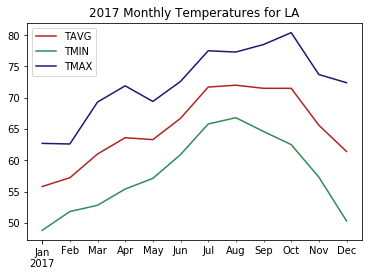

In [21]:
df.plot(kind='line',
       color=['firebrick', 'seagreen', 'midnightblue'],
       title='2017 Monthly Temperatures for LA')

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Below are lists containing monthly average precipitation (unit: inches) during 2017 for three US cities - San Diego, Miami, and Detroit. 

1. Create a new DataFrame called `pr_df` storing three columns of precipitation data (named `SD`, `MIA`, and `DET`) and a DatetimeIndex ranging from 01/2017 through 12/2017.
2. Create a bar plot (`kind='bar'`) to see how precipitation varied across each city during this year.

In [22]:
sd_precip = [3.02, 3.71, 0.08, 0.01, 0.92, 0.02, 0.00, 0.00, 0.08, 0.00, 0.02, 0.07]
mia_precip = [3.41, 1.31, 3.92, 2.16, 2.69, 15.97, 12.45, 8.57, 14.97, 12.61, 4.41, 0.66]
det_precip = [2.84, 1.91, 4.26, 3.55, 4.38, 2.03, 2.44, 3.91, 0.91, 2.84, 4.93, 1.49]

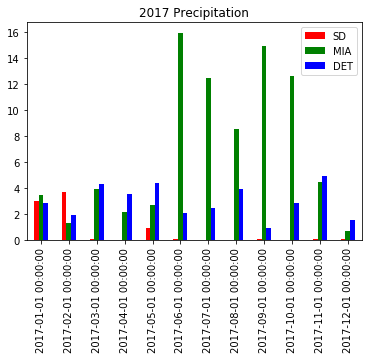

In [23]:
# Create the DataFrame
pr_df = pd.DataFrame()
pr_df['SD'] = sd_precip
pr_df['MIA'] = mia_precip
pr_df['DET'] = det_precip
pr_df.index = pd.date_range(start='2017-01', end='2017-12', freq='MS')

# Plot the DataFrame
# We'll fix the x-axis labels next
pr_df.plot(kind='bar',
          color=['red', 'green', 'blue'],
          title='2017 Precipitation')

# Blending Matplotlib and Pandas Plotting

We can improve our Pandas-based plot using regular matplotlib commands.  

I'll demonstate an example below that modified the bar chart we just created in the last in-class exercise. 

Soon, we'll dive deeper into Matpotlib to better customize our plots.

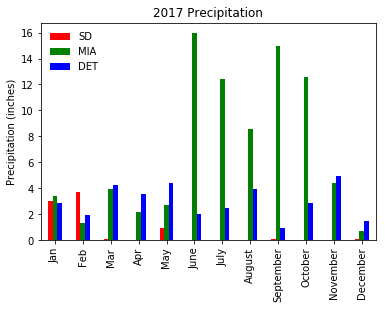

In [24]:
# Bar plot created using Pandas
pr_df.plot(kind='bar',
          color=['red', 'green', 'blue'],
          title='2017 Precipitation')

# Modifications created using Matplotlib
xtick_locations = range(12) # 0, 1,..., 11
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']


plt.ylabel('Precipitation (inches)')
plt.xticks(xtick_locations, xtick_labels)
plt.legend(loc='upper left', frameon=False)

# DataFrame Statistics 

Recall that standard statistics (like mean, min, max) on Series were found with, for example:

In [25]:
sample_series = pd.Series([12.1, 10.9, 5.5, 3.2, 7,5])
series_mean = sample_series.mean()
print(series_mean)

7.283333333333334


We can compute standard statistics on DataFrames with only one extra bit of information - whether that statistic should be performed along the row-axis or the column-axis.

Axes are numbered 0 or 1, with **axis=0 for calculations across rows** and **axis=1 for calculations across columns.** 

Let's demonstrate on `df`, first recalling what this DataFrame looks like:

In [26]:
df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


In [27]:
# Maximums across rows (or max value per column)
df.max(axis=0)

TAVG    72.0
TMIN    66.8
TMAX    80.4
dtype: float64

In [28]:
# Minimums across columns (this just equals the TMIN column!)
df.min(axis=1)

2017-01-01    48.8
2017-02-01    51.8
2017-03-01    52.8
2017-04-01    55.4
2017-05-01    57.1
2017-06-01    60.9
2017-07-01    65.8
2017-08-01    66.8
2017-09-01    64.6
2017-10-01    62.5
2017-11-01    57.3
2017-12-01    50.3
Freq: MS, dtype: float64

In [29]:
# Mean of TMAX and TMIN across the first 6 months 
# "Chaining" or linking slicing and statistics together! 
df.loc['2017-01-01':'2017-06-01', ['TMAX', 'TMIN']].mean(axis=0)

TMAX    68.083333
TMIN    54.466667
dtype: float64

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Using `df`, compute the following:

1. Average monthly minimum temperature during the summmer (June, July, and August)
2. Average monthly minimum and maximum temperature during the fall (September, October, November)

In [64]:
avg_min_jja = df.loc['2017-06':'2017-08', 'TMIN'].mean(axis=0)
avg_min_max_son = df.loc['2017-09':'2017-11', ['TMIN', 'TMAX']].mean(axis=0)

# Creating New Columns From Existing Columns

We often want to create a new column of data based on an analysis of existing columns. 

Unit conversion is a common example of this process. For example, let's convert `TAVG` in our `df` from units Fahrenheiht to Celsius:

In [31]:
df['TAVG(C)'] = (df['TAVG'] - 32) * (5/9)
df.round(2)

,TAVG,TMIN,TMAX,TAVG(C)
2017-01-01,55.8,48.8,62.7,13.22
2017-02-01,57.2,51.8,62.6,14.00
2017-03-01,61.0,52.8,69.3,16.11
2017-04-01,63.6,55.4,71.9,17.56
2017-05-01,63.3,57.1,69.4,17.39
2017-06-01,66.7,60.9,72.6,19.28
2017-07-01,71.7,65.8,77.5,22.06
2017-08-01,72.0,66.8,77.3,22.22
2017-09-01,71.5,64.6,78.5,21.94
2017-10-01,71.5,62.5,80.4,21.94


For a bit more advanced example, let's examine a dataset of daily maximum temperatures:

In [32]:
# Daily max temperatures during July 2018 
july_temps = pd.DataFrame(columns=['temperature'],
                         data=[96, 91, 90, 92, 93, 95, 94, 90, 89, 88, 87, 85, 89, 88, 90, 
                               92, 94, 98, 99, 100, 97, 94, 93, 92, 90, 88, 90, 90, 90, 90, 91],
                         index=pd.date_range(start='2018-07-01', end='2018-07-31', freq='D'))
july_temps.head(5)

,temperature
2018-07-01,96
2018-07-02,91
2018-07-03,90
2018-07-04,92
2018-07-05,93


And we could ask the question: How many days during July exceeded 95 degrees F?

To answer this, we need to create a new column in `july_temps` storing a True or False value indicating whether that day's temperature is above 95:

In [33]:
# Create a new column in the dataframe called 'extreme' 
# based on whether temperature is greater than 95
july_temps['extreme'] = july_temps['temperature'] > 95
july_temps

,temperature,extreme
2018-07-01,96,True
2018-07-02,91,False
2018-07-03,90,False
2018-07-04,92,False
2018-07-05,93,False
2018-07-06,95,False
2018-07-07,94,False
2018-07-08,90,False
2018-07-09,89,False
2018-07-10,88,False


Now we want to add up the number of `True` values in the last column. How can we do that?

Luckily, Python treats `False` as 0 and `True` as 1. So we can simply sum the last column!

In [34]:
# Sum the number of extreme days (=True)
num_extreme = july_temps['extreme'].sum()

print('July experienced', num_extreme, 'extremely hot days.')
# Alternative print statement:
#print('July experienced {0} extremely hot days.'.format(num_extreme))

July experienced 5 extremely hot days.


---

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

The DataFrame below contains hourly air temperature (degrees F) and precipitation (inches) for January 15, 2010.

Snow will occur in a given hour if the temperature is at or below freezing. How many hours of snowfall did this day experience? 

In [35]:
jan_df = pd.DataFrame()
jan_df['T'] = [33, 34, 35, 36, 34, 33, 32, 31, 31, 30, 30, 29, 
             28, 29, 30, 31, 32, 33, 35, 38, 40, 41, 41, 41]
jan_df['P'] = [0.25, 0.21, 0.23, 0.20, 0.22, 0.26, 0.30, 0.35, 
             0.31, 0.33, 0.21, 0.15, 0.10, 0.09, 0.04, 0.10,
            0.11, 0.15, 0.05, 0.13, 0.20, 0.25, 0.00, 0.00]
jan_df.index = pd.date_range(start='2010-01-15 00:00', end='2010-01-15 23:00', freq='H')
jan_df.head(4)

,T,P
2010-01-15 00:00:00,33,0.25
2010-01-15 01:00:00,34,0.21
2010-01-15 02:00:00,35,0.23
2010-01-15 03:00:00,36,0.20


In [36]:
jan_df['snowing'] = jan_df['T'] <= 32.
num_snow_hours = jan_df['snowing'].sum()
print('This day experienced {0} hours of snowfall.'.format(num_snow_hours))

This day experienced 11 hours of snowfall.


# Reading external data files  📜 📃 📄 📑

Most commonly, we will use Pandas to read external data files (e.g. text, csv, Excel) for further analyses. 

Pandas can read/write a [wide range of file types](https://pandas.pydata.org/pandas-docs/stable/io.html), but for our purposes, we'll stick with comma-separate-value or CSV files.

CSV files are simply text files where each data point in a row is separated by a comma. For instance:

```
Date,Value1,Value2,Value3
2018-01,12,23,45
2018-02,19,21,23
2018-03,17,19,31
```

We are going to start working with a file called `slr_rcp85_la.csv`, which should be located in the /data/ sub-directory in your AOS51 directory. 

This file shows the fraction (0 to 1) of hours in a year that the sea level off the coast of LA exceeds approximately 5 feet. The future projections are based on a business-as-usual greenhouse gas emissions scenario called RCP8.5. 

We can read in the file and assign it to a new DataFrame called `slr` with:

In [65]:
# Replace nberg with your name below!
slr_df = pd.read_csv('/Users/nberg/AOS51/data/slr_rcp85_la.csv', sep=',')

We supply the `pd.read_csv()` command with at least two-arguments: the path to the csv file and then what kind of seperator (sep) exists between each data point. In this case, it's a comma `,`, but it could be a space, a tab, etc. 

Let's view `slr_df` to see what we are working with:

In [66]:
print(slr_df.head(5))
print(slr_df.tail(5))

   year       slr
0  2000  0.000000
1  2001  0.000000
2  2002  0.000114
3  2003  0.000342
4  2004  0.000000
    year       slr
95  2095  0.857648
96  2096  0.876941
97  2097  0.903196
98  2098  0.918493
99  2099  0.949429


OK, we have 100 years of data, but we want `year` to be our index, not numbers going from 0 to 99.

For that, we need to specify during the read-in procedure which column (as an integer starting with 0) to use as our index:

In [39]:
slr_df = pd.read_csv('/Users/nberg/AOS51/data/slr_rcp85_la.csv', sep=',', index_col=0)
slr_df.head(5)

,slr
year,
2000,0.000000
2001,0.000000
2002,0.000114
2003,0.000342
2004,0.000000


Looking better...

Since we are working with dates as our index, we want to transform the index to be a true DatetimeIndex so that we can resample it, for instance. 

For that we need to tell Pandas to parse the dates in the index:

In [40]:
slr_df = pd.read_csv('/Users/nberg/AOS51/data/slr_rcp85_la.csv', sep=',', index_col=0, parse_dates=True)
slr_df.head(5)

,slr
year,
2000-01-01,0.000000
2001-01-01,0.000000
2002-01-01,0.000114
2003-01-01,0.000342
2004-01-01,0.000000


Optionally, we can remove the `year` title from our index, which will help realign the display of our DataFrame:

In [41]:
slr_df.index.name = None
slr_df.head(5)

,slr
2000-01-01,0.000000
2001-01-01,0.000000
2002-01-01,0.000114
2003-01-01,0.000342
2004-01-01,0.000000


Let's quickly visualize this data set to see what future sea levels could look like over LA! 

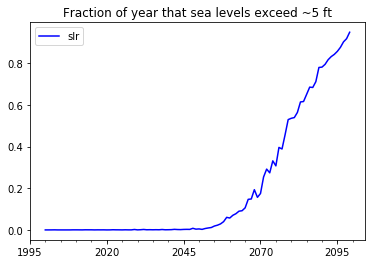

In [42]:
slr_df.plot(kind='line',
           color='blue',
           title='Fraction of year that sea levels exceed ~5 ft')

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise 😓 </span>

Let's examine how the number of extremely hot days (> 90 deg F) are projected to change over LA during the rest of this century. 

We'll examine observed (1950 - 2005) values and projections (2005 - 2100) from 4 global climate models (GCM)

Instructions:
1. Examine the raw data before we start analyzing it. Open the file `extreme_heat_days_rcp85_tasmax.csv` in Excel (or on the command line with `>>> cat extreme_heat_days_rcp85_tasmax.csv`.

2. Generate a new DataFrame called `extreme_heat` by reading in the file called `extreme_heat_days_rcp85_tasmax.csv`.
    - Make sure you tell Pandas which column to use as the index and to parse those dates. 
3. Slice observed values spanning 1980-2000
4. Compute the average observed number of extremely hot days during 1980-2000.
5. Slice projected values spanning 2040-2060 and 2080-2100 for all GCMs.
6. Compute the average projected number of extremelt hot days during 2040-2060 and 2080-2100 for each GCM. 
7. Calculate the change in extremely hot days from 1980-2000 to 2040-2060 and 2080-2100 for each GCM. 
8. Plot the time series in the DataFrame using Pandas.

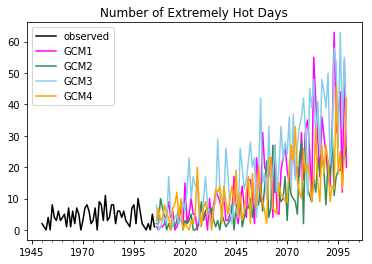

In [43]:
extreme_heat = pd.read_csv('/Users/nberg/AOS51/data/extreme_heat_days_rcp85_tasmax.csv', 
                           sep=',', index_col=0, parse_dates=True)
extreme_heat.index.name = None;
extreme_heat.head(4)

# Observed average from 1980-2000
obs_avg_1980_2000 = extreme_heat.loc['1980':'2000', 'observed'].mean(axis=0)

# GCM1, 2, 3, and 4 averages during 2040-2060, and 2080-2100
gcm_avg_2040_2060 = extreme_heat.loc['2040':'2060', ['GCM1', 'GCM2', 'GCM3', 'GCM4']].mean(axis=0)
gcm_avg_2080_2100 = extreme_heat.loc['2080':'2100', ['GCM1', 'GCM2', 'GCM3', 'GCM4']].mean(axis=0)

# Changes by mid- and late-century 
change_2040_2060 = gcm_avg_2040_2060 - obs_avg_1980_2000
change_2080_2010 = gcm_avg_2080_2100 - obs_avg_1980_2000

# Time series
extreme_heat.plot(kind='line',
                 color=['black', 'magenta', 'seagreen', 'skyblue', 'orange'],
                 title='Number of Extremely Hot Days')

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise ☃️</span>

Let's now examine how snowpack in the Sierra Nevada evolves over the course of a snow-season, which starts on September 1st and ends on August 31 of the following year. 

We'll work with a new file called `sierra_snowpack.csv`, containing daily snowpack levels (unit: mm) for a location in the Northern Sierra and a location in the Southern Sierra. 

Instructions:
1. Examine the contents of `sierra_snowpack.csv` in Excel or on the command line to see what we are working with. 
2. Read-in the file to generate a new DataFrame called `snowpack` containing two columns of snowpack data (one column for each location) and make sure you parse the dates for a corresponding DatetimeIndex.
3. Use the Pandas command [idxmax](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) determine the day where snowpack reached it peak value for both locations.
    * Note: we have not covered this command yet, so you'll need to view the documentation to see how it works, then give it a try!
4. Create two new columns in `snowpack` called `N_Sierra_in` and `S_Sierra_in` that convert the snowpack time series from units millimeters to inches. 
5. Create a new DataFrame called `snowpack_monthly` that resamples `snowpack` to monthly-mean values.
   * Hint: Resampling DataFrames is nearly identical to resampling Series, check out the [official documentation here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) to see examples.
6. Create a line plot monthly-mean snowpack **in inches** for both locations (only two lines, not four!).
   * Hint: since we only want to plot a subset of columns in the DataFrame, we'll need to specific what our y-data should be. Check out the [plotting documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to see how to accomplish this. 

N_Sierra   1997-03-18
S_Sierra   1997-03-03
dtype: datetime64[ns]


/anaconda3/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


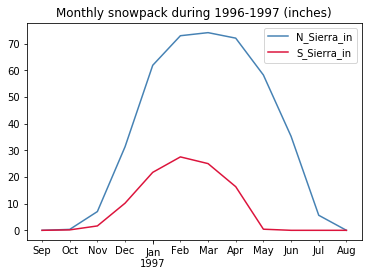

In [68]:
# Read-in the file, parsing the dates as the index
snowpack = pd.read_csv('/Users/nberg/AOS51/data/sierra_snowpack.csv', sep=',', index_col=0, parse_dates=True)
#print(snowpack.head(4))

# Dates of maximum snowpack
print(snowpack.idxmax(axis=0))

# Create new column that convert from mm to inches
# 25.4 mm = 1 inch
snowpack['N_Sierra_in'] = snowpack['N_Sierra'] / 25.4
snowpack['S_Sierra_in'] = snowpack['S_Sierra'] / 25.4

# Resampling from daily to monthly means
snowpack_monthly = snowpack.resample('MS').mean()

# Line plots of only the time series in inches
snowpack_monthly.plot(y=['N_Sierra_in', 'S_Sierra_in'],
                    kind='line',
                    color=['steelblue', 'crimson'],
                    title='Monthly snowpack during 1996-1997 (inches)')

# Diving Deeper Into Matplotlib 🎨

We've done a lot of plotting using Pandas, which is completely fine, but it's not as powerful as matplotlib.

Let's learn how plots actually work in matplotlib, then start customizing them to our liking. 

---
## Terminology 

Let's view [this Jupyer Notebook](https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb) to visualuze how Matplotlib defines three terms:

1. Figure
2. Axes/subplot
3. Y-axis and X-axis 

We see that:

1. The "Figure" is the highest-level container of the plot. It encapsulates the entire page where stuff is drawn. 

2. "Axes" are the area that we plot data on, along with any ticks/labels/etc associated with it. An Axes is created with a call to `subplot`, so Axes and Subplot are mostly synonymous terms now. 

3. Each Axes has an "XAxis" and a "YAxis". These contain the ticks, tick locations, labels, etc.
---

## Creating a plot

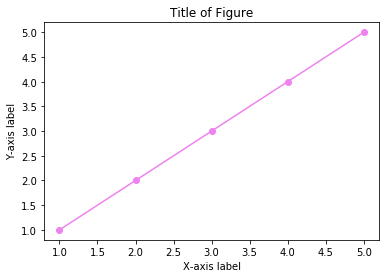

In [69]:
# Create some sample data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

fig = plt.figure() # create a Figure
ax = fig.add_subplot(1,1,1) # add a Subplot in the Figure, where (row #, col #, subplot #) = (1, 1, 1)
ax.plot(x_data, y_data, color='violet', marker='o') # add data to the Axes/subplot
ax.set_title('Title of Figure')
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
plt.show()

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise 🦀</span>

Let's use `matplotlib` to create a nice line plot of monthly-average high temperature over Baltimore, MD.

| Month | Temp (F)|
|---|---|
|January|42|
|February|46|
|March|54|
|April|66|
|May|75|
|June|85|
|July|89|
|August|87|
|September|80|
|October|68|
|November|58|
|December|46|

Steps:
1. Use [np.arange()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) to create a range of month indices spanning 1 through 12. Assign this array to the variable name `months`. 
2. Create a list of monthly-average high temperatures called `temperature`.
2. With `temperature` on the y-axis and `months` on the x-axis, create a line plot using `matplotlib`. Make sure you give your plot a title and label the x- and y-axis.

Text(0.5,0,'Month')

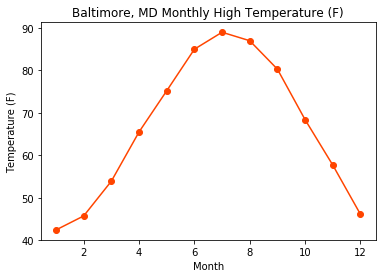

In [70]:
months = np.arange(1,13)
temperature = [42.4, 45.7, 53.9, 65.5, 75.2, 85.0, 89.0, 87.0, 80.3, 68.4, 57.7, 46.1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(months, temperature, color='orangered', marker='o')
ax.set_title('Baltimore, MD Monthly High Temperature (F)')
ax.set_ylabel('Temperature (F)')
ax.set_xlabel('Month')

## Customizing the ticks and tick-labels
So far, we've let matplotlib figure out the best tick spacing and labels for our plots, but they are highly customizable.

** Setting x-ticks and y-ticks**

We can manually set the [x-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) and [y-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html) using:

`ax.set_xticks([list or 1D array of tick locations])`

`ax.set_yticks([list or 1D array of tick locations])`

** Setting x-ticklabels and y-ticklabels **

We can set the [x-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) and [y-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html) using:

`ax.set_xticklabels([list of tick labels as strings])`

`ax.set_yticklabels([list of tick labels as strings])`

** Example **

If we have 12 data points representing some values for a given calendar month, we can set 12 x-ticks with labels as:

`ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])` 

OR 

`ax_set_xticks(np.arange(1,13))`

`ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Revise your plot of Baltimore monthly-temperatures to have 12 `xticks` with corresponding monthly `xticklabels`. The labels can be full month names or abbreviated (e.g. 'Jan', or 'J'). 

[Text(0,0,'January'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct'),
 Text(0,0,'Nov'),
 Text(0,0,'Dec')]

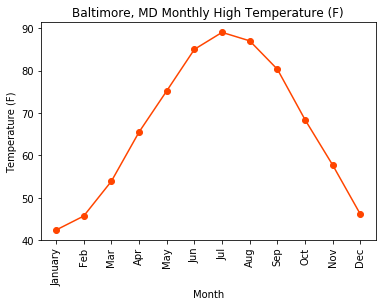

In [71]:
months = np.arange(1,13)
temperature = [42.4, 45.7, 53.9, 65.5, 75.2, 85.0, 89.0, 87.0, 80.3, 68.4, 57.7, 46.1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(months, temperature, color='orangered', marker='o')
ax.set_title('Baltimore, MD Monthly High Temperature (F)')
ax.set_ylabel('Temperature (F)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(['January', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)

## Multi-panel plots

Multi-panel plots have two differences from the single-panel plots we have worked with so far:

1. Each sub-panel needs to have a unique `axes` (e.g. `ax1`, `ax2`, etc.)
2. The sub-panel position needs to be defined when added to the figure in the (row #, col #, plot #) call.

Let's demonstate with a 1 row x 2 column multi-panel plot:

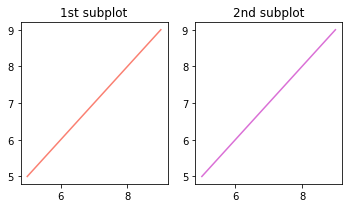

In [72]:
fig = plt.figure(figsize=(5,3)) # specify the figure (width, height) in unit inches

ax1 = fig.add_subplot(1,2,1) # 1 row, 2 columns, 1st subplot
ax1.plot(np.arange(5,10), np.arange(5,10), color='salmon')
ax1.set_title('1st subplot')

ax2 = fig.add_subplot(1,2,2) # 1 row, 2 columns, 2nd subplot
ax2.plot(np.arange(5,10), np.arange(5,10), color='orchid')
ax2.set_title('2nd subplot')

fig.tight_layout() # automatically adjusts subplots to fit in the figure
plt.show()

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Create a new 4-panel plot showing monthly-average high temperature (F), low temperature (F), precipitation (inches), and snowfall (inches) for Baltimore, MD. 

* High and low temperature should be line plots
* Precipitation and snowfall should be bar plots

Monthly-average (Jan - Dec) low temperature, precipitation and snowfall data are provided below. The high temperature data is the same as used in the previous exercise. 

In [73]:
high_temp = [42.4, 45.7, 53.9, 65.5, 75.2, 85.0, 89.0, 87.0, 80.3, 68.4, 57.7, 46.1]
low_temp = [29.2, 31.4, 38.8, 47.6, 56.9, 67.1, 72.5, 70.9, 63.8, 51.8, 42.9, 32.8]
precip = [2.92, 2.60, 3.86, 3.22, 3.49, 3.27, 4.62, 3.39, 4.09, 3.05, 2.97, 3.41]
snow = [6.8, 8.0, 1.9, 0, 0, 0, 0, 0, 0, 0, 0.4, 3.0] 

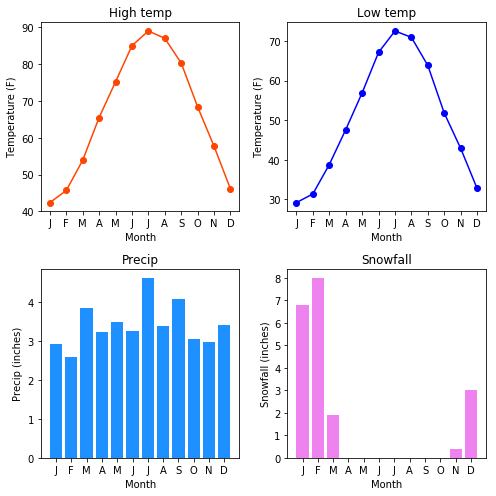

In [74]:
month_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(months, high_temp, color='orangered', marker='o')
ax1.set_title('High temp')
ax1.set_ylabel('Temperature (F)')
ax1.set_xlabel('Month')
ax1.set_xticks(np.arange(1,13))
ax1.set_xticklabels(month_labels)

ax2 = fig.add_subplot(2,2,2)
ax2.plot(months, low_temp, color='blue', marker='o')
ax2.set_title('Low temp')
ax2.set_ylabel('Temperature (F)')
ax2.set_xlabel('Month')
ax2.set_xticks(np.arange(1,13))
ax2.set_xticklabels(month_labels)

ax3 = fig.add_subplot(2,2,3)
ax3.bar(months, precip, color='dodgerblue')
ax3.set_title('Precip')
ax3.set_ylabel('Precip (inches)')
ax3.set_xlabel('Month')
ax3.set_xticks(np.arange(1,13))
ax3.set_xticklabels(month_labels)

ax3 = fig.add_subplot(2,2,4)
ax3.bar(months, snow, color='violet')
ax3.set_title('Snowfall')
ax3.set_ylabel('Snowfall (inches)')
ax3.set_xlabel('Month')
ax3.set_xticks(np.arange(1,13))
ax3.set_xticklabels(month_labels)

fig.tight_layout()